In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


import warnings
warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

### Imports
Importing required libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt     #data visualization
import seaborn as sns               #data visualization

%matplotlib inline


## Get the data

In [4]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Since the **Serial No.** column is not required, removing it from the data frame

In [5]:
df.drop('Serial No.', axis = 1, inplace = True)

## Data Set Summary

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB
None


In [7]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


The features described in the above data set are:

**1. Count** tells us the number of NoN-empty rows in a feature.

**2. Mean** tells us the mean value of that feature.

**3. Std** tells us the Standard Deviation Value of that feature.

**4. Min** tells us the minimum value of that feature.

**5. 25%, 50%**, and **75%** are the percentile/quartile of each features.

**6. Max** tells us the maximum value of that feature.

## Exploratory Data Analysis

**Generating a heatmap**

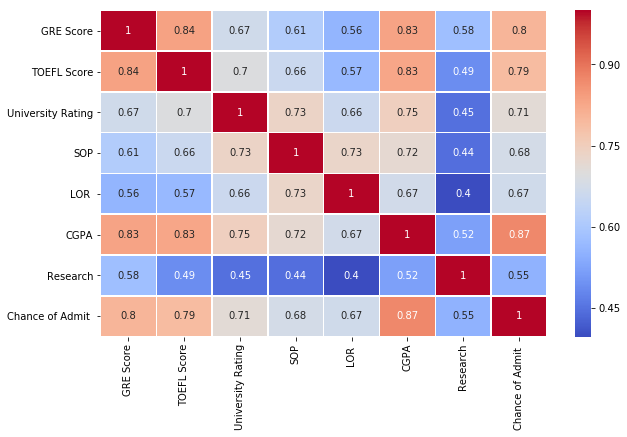

In [8]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, linewidths=0.5, cmap = 'coolwarm')
plt.show()

**Creating a Pair Plot**

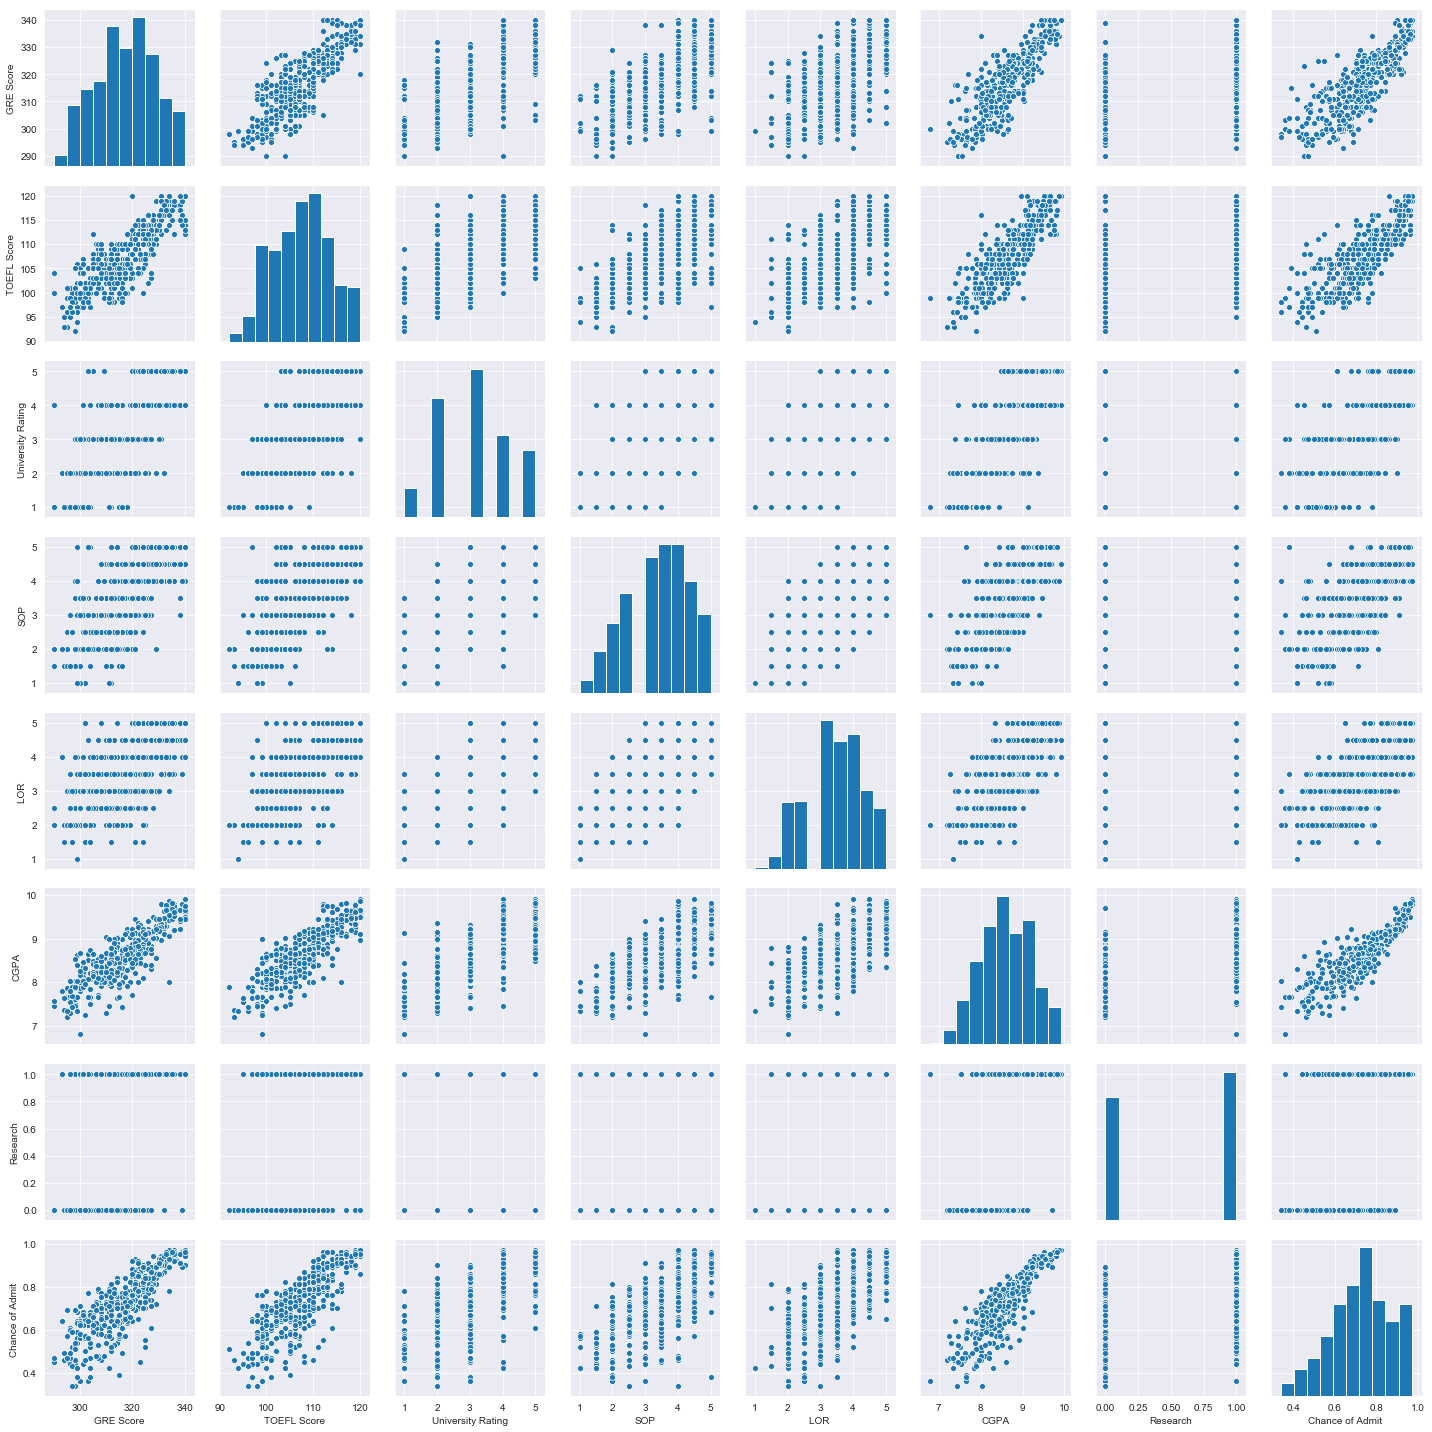

In [9]:
sns.set_style('darkgrid')
sns.pairplot(df)
plt.show()

**Creating a Count Plot for University Rating**

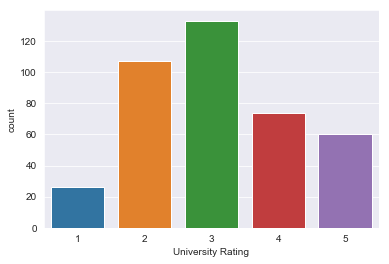

In [10]:
sns.countplot(df['University Rating'])
plt.show()

**Create a Joint Plot for Chance of Admit vs. CGPA**

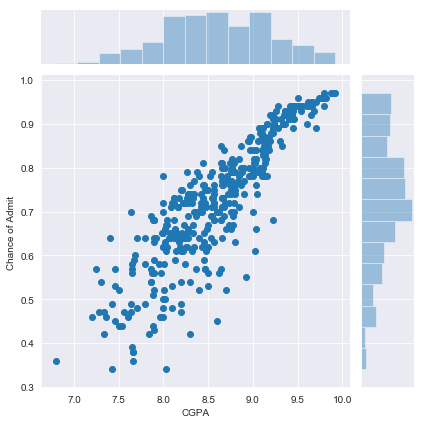

In [11]:
sns.jointplot('CGPA','Chance of Admit ', data = df)
plt.show()

**Create a histogram for TOEFL Score distribution**

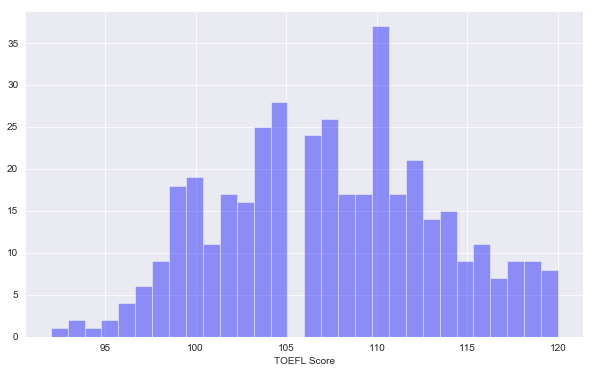

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(df['TOEFL Score'], kde = False, bins = 30, color = 'blue')
plt.show()

**Create a histogram for GRE Score distribution**

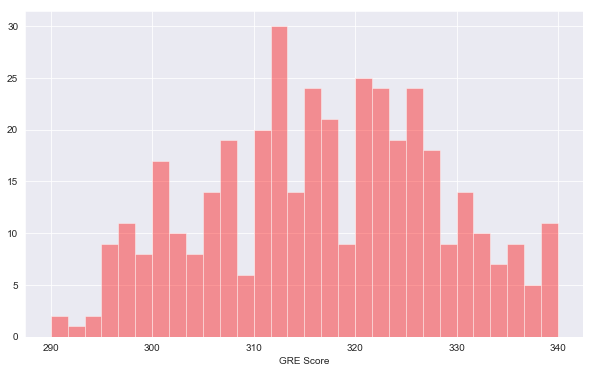

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(df['GRE Score'], kde = False, bins = 30, color = 'red')
plt.show()

## Training and Testing Data
 Let's split the data into training and testing sets. Set a variable X equal to the numerical features of the customers and a variable y equal to the "Chance of Admit" column.

In [14]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [15]:
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]
y = df['Chance of Admit ']

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Setting  test_size=0.3 and random_state=101**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.35, random_state = 101)

**Training the Model**<br><br>
**Import LinearRegression from sklearn.linear_model**

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
linearmodel = LinearRegression()

**fit linearmodel on the training data.**

In [20]:
linearmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [21]:
linearmodel.coef_

array([ 0.00215867,  0.00319752,  0.01274723, -0.00235094,  0.01837022,
        0.1099192 ,  0.010619  ])

In [22]:
cdf = pd.DataFrame(linearmodel.coef_, X.columns, columns=['Coefficient'])
cdf

,Coefficient
GRE Score,0.002159
TOEFL Score,0.003198
University Rating,0.012747
SOP,-0.002351
LOR,0.018370
CGPA,0.109919
Research,0.010619


## Predicting Test Data


In [23]:
prediction = linearmodel.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

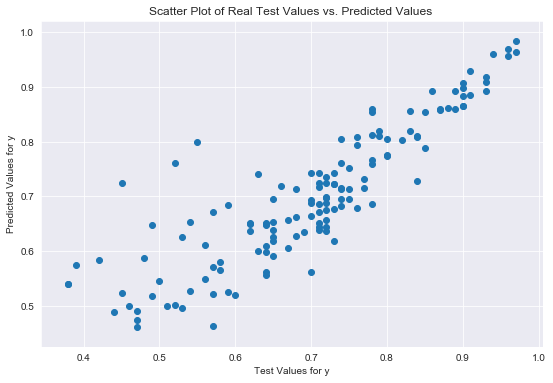

In [24]:
plt.figure(figsize=(9,6))
plt.scatter(y_test,prediction)
plt.xlabel('Test Values for y')
plt.ylabel('Predicted Values for y')
plt.title('Scatter Plot of Real Test Values vs. Predicted Values ')
plt.show()

## Evaluating the Model


In [25]:
from sklearn import metrics
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test,prediction))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Mean Absolute Error(MAE): 0.04681696322795178
Mean Squared Error(MSE): 0.004567955209416708
Root Mean Squared Error(RMSE): 0.06758664963893911
